In [4]:
using DifferentialEquations
using FFTW
using LinearAlgebra

using PyPlot
PyPlot.svg(true);

 We want to solve $u_t = u_{xx}$ using finite differences and using a spectral method.

In [87]:
# finite differences

# sample points
N = 50

x_n = collect(2π.*(0:N-1)./N)

h = x_n[2] - x_n[1]

# finite difference matrix
D = diagm(0 => -2ones(N), 1 => ones(N-1), -1 => ones(N-1))./h^2

# ODE right hand side
function f_finite_diff(du, u, p, t)
    du .= D*u
end

# Initial condition u(x, 0) = sin(x)
u0 = sin.(x_n)

# solve
tspan = (0.0, 1)

prob = ODEProblem(f_finite_diff, u0, tspan)
sol = solve(prob, Tsit5(), saveat=0.1);

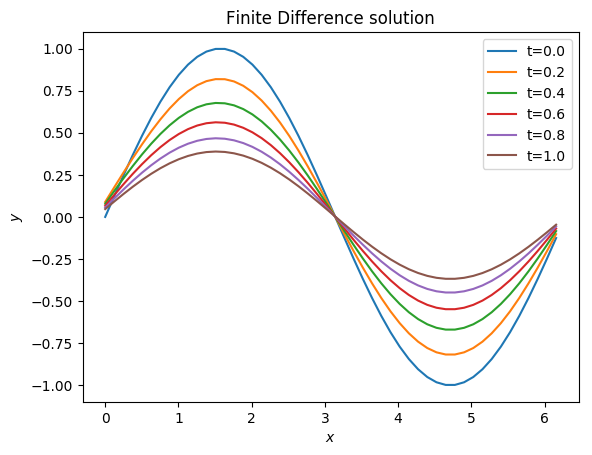

PyObject Text(0.5, 1.0, 'Finite Difference solution')

In [88]:
figure()

for i=1:2:length(sol.t)
    plot(x_n, sol[:,i], label="t=$(sol.t[i])")
end

legend()
xlabel(L"x")
ylabel(L"y")
title("Finite Difference solution")

In [89]:
# spectral solver

# k points: Need to make sure to identify equivalent wavenumbers
k_nu = vcat(0:Int64(N/2), (-1).*(Int64(N/2)-1:-1:1))

# ODE right hand side
function f_spectral(du, u, p, t)
    du .= -(k_nu.^2).*u
end

# FFT initial conditions
uhat0 = fft(u0)

# solve
tspan = (0.0, 1)

prob = ODEProblem(f_spectral, uhat0, tspan)
sol = solve(prob, Tsit5(), saveat=0.1);

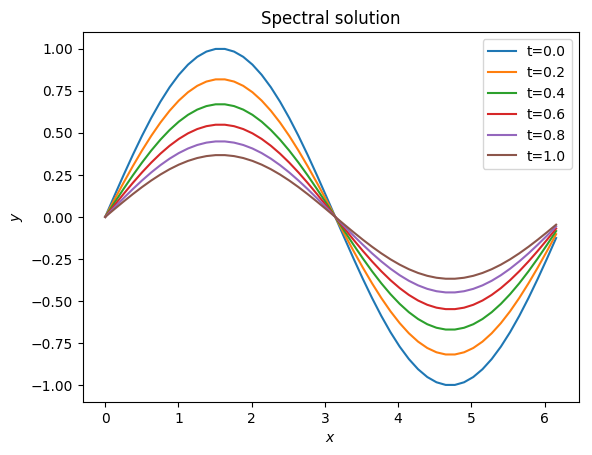

PyObject Text(0.5, 1.0, 'Spectral solution')

In [90]:
figure()

for i=1:2:length(sol.t)
    # Inverse transform spectral solution
    u = real(ifft(sol[:,i]))
    
    plot(x_n, u, label="t=$(sol.t[i])")
end

legend()
xlabel(L"x")
ylabel(L"y")
title("Spectral solution")